In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/40.2 MB 660.6 kB/s eta 0:01:01
   ---------------------------------------- 0.2/40.2 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.2/40.2 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.3/40.2 MB 1.8 MB/s eta 0:00:23
   ---------------------------------------- 0.4/40.2 MB 2.2 MB/s eta 0:00:18
    --------------------------------------- 0.5/40.2 MB 2.2 MB/s eta 0:00:19
    --------------------------------------- 0.6/40.2 MB 2.2 MB/s eta 0:00:19
    --------------------------------------- 0.7/40.2 MB 2.3 MB/s eta 0:00:18
    --------------------------------------- 0.8/40.2 MB 2.2 MB/s eta 0:00:19
    --------------------------------------- 0.9/40.2 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 1.0/40.2 MB 2.2 MB/s eta 0:00:19
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.4.2 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.4.2 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 6.33.4 which is incompatible.


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

In [6]:
TRAIN_DIR = r"C:\Projects\Medical_Image_Classification\dataset\train"
classes = ['NORMAL', 'PNEUMONIA']

In [7]:
# Checking File Counts 
stats = []
for cls in classes:
    path = os.path.join(TRAIN_DIR, cls)
    if os.path.exists(path):
        count = len(os.listdir(path))
        stats.append({'Class': cls, 'Count': count})
    else:
        print(f"Warning: Folder nahi mila -> {path}")

df_stats = pd.DataFrame(stats)
print(df_stats)


       Class  Count
0     NORMAL   1341
1  PNEUMONIA   3875


In [ ]:
# Class Distribution 

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Count', data=df_stats, palette='viridis')
plt.title('Advanced EDA: Training Data Distribution')
plt.show()

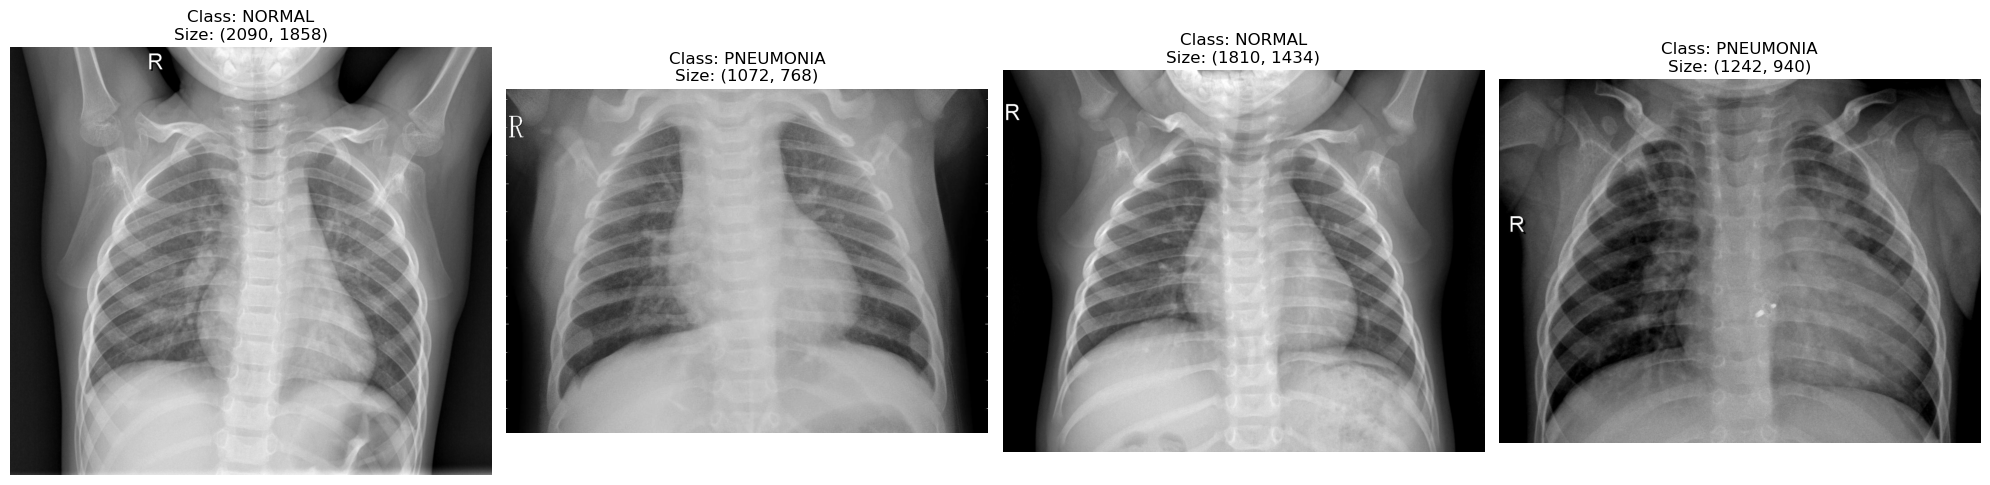

In [8]:
# Sample Images with Metadata
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
for i, cls in enumerate(classes * 2): # 2 normal, 2 pneumonia samples
    folder = os.path.join(TRAIN_DIR, cls)
    img_name = os.listdir(folder)[i]
    img_path = os.path.join(folder, img_name)
    img = Image.open(img_path)
    
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Class: {cls}\nSize: {img.size}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

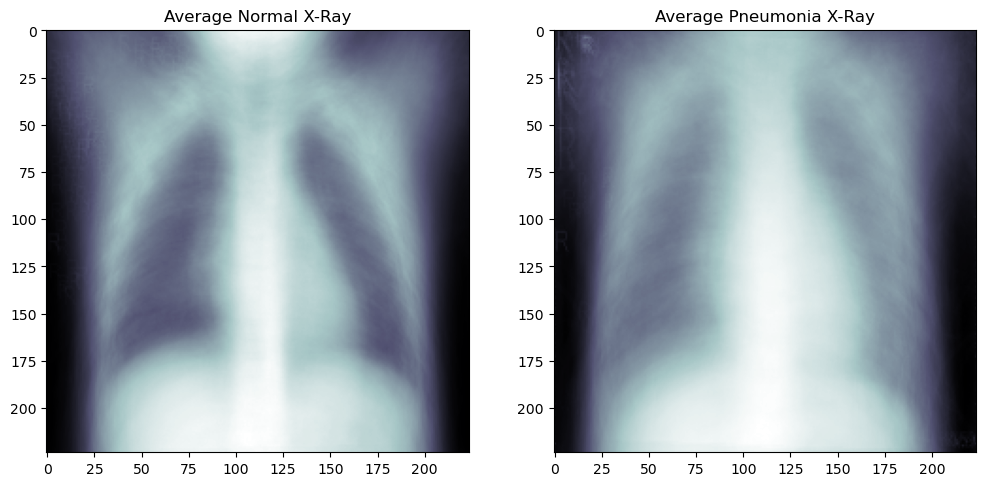

In [9]:
 # Average Image (Pattern Recognition) 
# Ye dikhata hai ki 'Average' chest X-ray kaisa dikhta hai har class ke liye
def get_average_img(class_name):
    path = os.path.join(TRAIN_DIR, class_name)
    images = [cv2.resize(cv2.imread(os.path.join(path, img), 0), (224, 224)) 
              for img in os.listdir(path)[:100]] # Pehli 100 images
    avg_img = np.mean(images, axis=0)
    return avg_img

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(get_average_img('NORMAL'), cmap='bone')
plt.title('Average Normal X-Ray')
plt.subplot(1, 2, 2)
plt.imshow(get_average_img('PNEUMONIA'), cmap='bone')
plt.title('Average Pneumonia X-Ray')
plt.show()

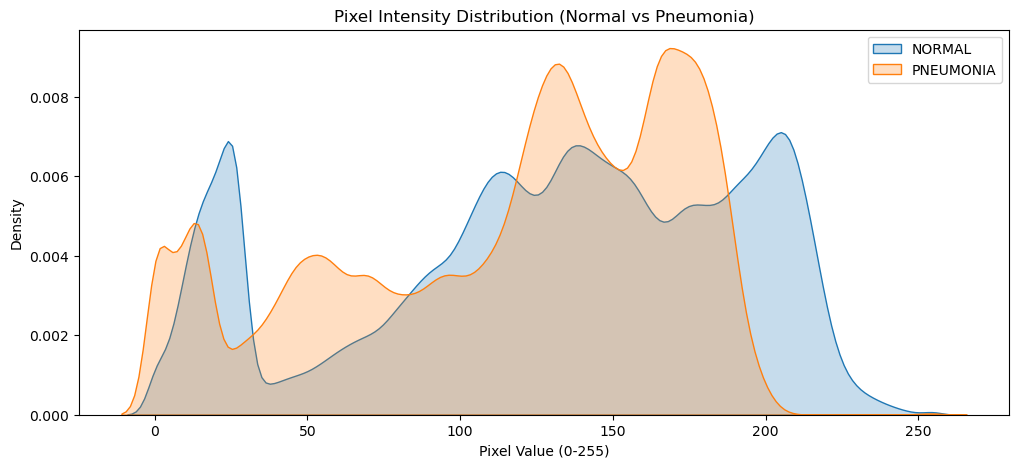

In [10]:
# Pixel Intensity Distribution 
plt.figure(figsize=(12, 5))
for cls in classes:
    path = os.path.join(TRAIN_DIR, cls)
    img = cv2.imread(os.path.join(path, os.listdir(path)[0]), 0)
    sns.kdeplot(img.flatten(), label=cls, fill=True)

plt.title('Pixel Intensity Distribution (Normal vs Pneumonia)')
plt.xlabel('Pixel Value (0-255)')
plt.legend()
plt.show()

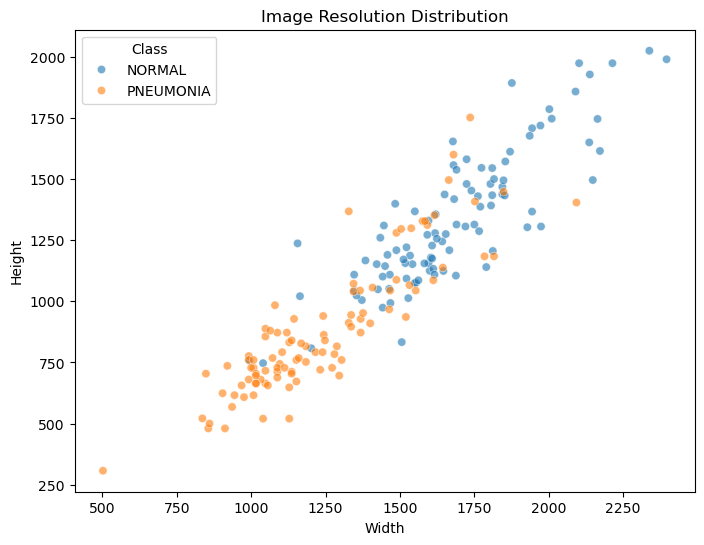

In [11]:
 # Image Resolution Analysis 
dims = []
for cls in classes:
    path = os.path.join(TRAIN_DIR, cls)
    for img_name in os.listdir(path)[:100]: # Sample 100 images
        img = Image.open(os.path.join(path, img_name))
        dims.append({'Width': img.size[0], 'Height': img.size[1], 'Class': cls})

df_dims = pd.DataFrame(dims)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dims, x='Width', y='Height', hue='Class', alpha=0.6)
plt.title('Image Resolution Distribution')
plt.show()

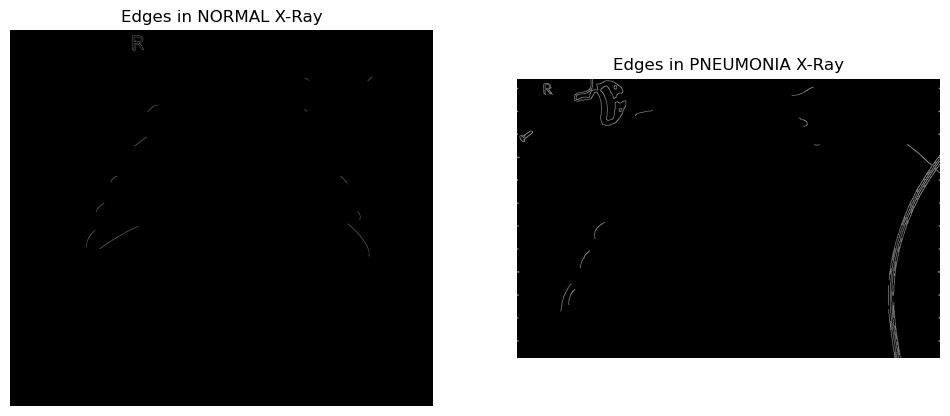

In [12]:
# Edge Detection (Canny) 
def plot_edges(class_name):
    path = os.path.join(TRAIN_DIR, class_name)
    img_name = os.listdir(path)[0]
    img = cv2.imread(os.path.join(path, img_name), 0)
    edges = cv2.Canny(img, 100, 200) # Edge detection
    
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edges in {class_name} X-Ray')
    plt.axis('off')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1); plot_edges('NORMAL')
plt.subplot(1, 2, 2); plot_edges('PNEUMONIA')
plt.show()

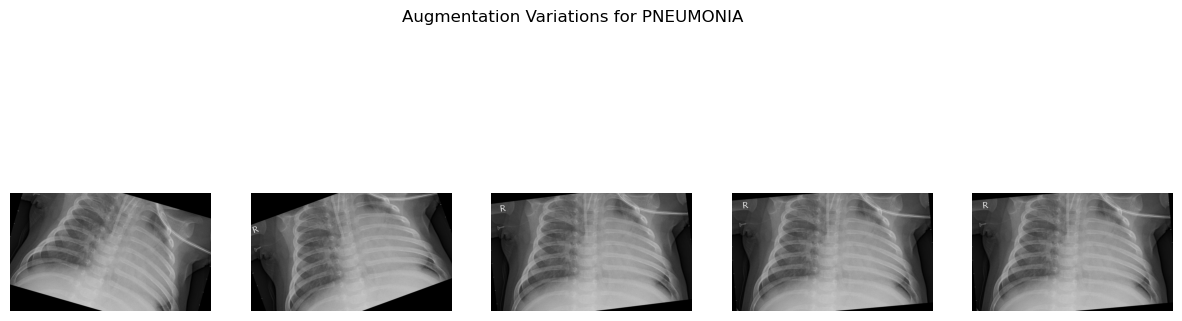

In [14]:
# Data Augmentation Preview ---
import random

def get_augmented_sample(class_name):
    path = os.path.join(TRAIN_DIR, class_name)
    img_name = random.choice(os.listdir(path))
    img = cv2.imread(os.path.join(path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Augmentation Variations for {class_name}')
    
    for i in range(5):
        plt.subplot(1, 5, i+1)
        # Random transformations using OpenCV
        rows, cols, _ = img.shape
        M = cv2.getRotationMatrix2D((cols/2, rows/2), random.randint(-20, 20), 1)
        aug_img = cv2.warpAffine(img, M, (cols, rows))
        
        plt.imshow(aug_img)
        plt.axis('off')
    plt.show()

get_augmented_sample('PNEUMONIA')